In [1]:
import pandas as pd

# Load the dataset from Hugging Face's raw CSV URL
csv_url = "https://huggingface.co/datasets/IDEALLab/power_electronics_v0/resolve/main/dataset_v0_1.csv"

# Read the CSV file into a pandas DataFrame
df = pd.read_csv(csv_url)

# Display the first few rows
print(df.head())

# Save it locally if needed
df.to_csv("./data/power_electronics_v0_1.csv", index=False)


         C1        C2        C3        C4        C5        C6        L1  \
0  0.000001  0.000001  0.000001  0.000001  0.000001  0.000001  0.000001   
1  0.000001  0.000001  0.000001  0.000001  0.000001  0.000001  0.000001   
2  0.000001  0.000001  0.000001  0.000001  0.000001  0.000001  0.000001   
3  0.000001  0.000001  0.000001  0.000001  0.000001  0.000001  0.000001   
4  0.000001  0.000001  0.000001  0.000001  0.000001  0.000001  0.000001   

         L2        L3   T1         g         r          e  
0  0.000001  0.000001  0.1  0.440126  0.914354  -3.903844  
1  0.000001  0.000001  0.2  0.410832  1.152453  -9.022484  
2  0.000001  0.000001  0.3  0.353193  1.521469 -14.144002  
3  0.000001  0.000001  0.4  0.256083  2.190335 -19.268402  
4  0.000001  0.000001  0.5  0.147918  3.205281 -24.395419  


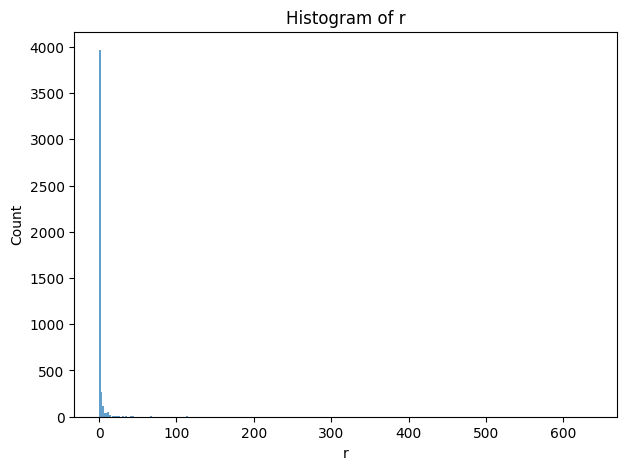

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Compute log(r + 1e-8)
r = df[' r']

# Histogram
plt.figure(figsize=(7, 5))
plt.hist(r, bins=300, alpha=0.7)
plt.xlabel("r")
plt.ylabel("Count")
plt.title("Histogram of r")
plt.show()


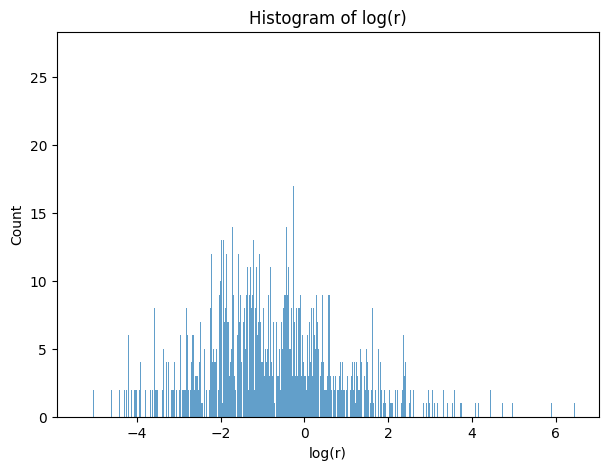

In [16]:
import numpy as np
import matplotlib.pyplot as plt

# Compute log(r + 1e-8)
log_r = np.log(df[' r'])

# Histogram
plt.figure(figsize=(7, 5))
plt.hist(log_r, bins=2000, alpha=0.7)
plt.xlabel("log(r)")
plt.ylabel("Count")
plt.title("Histogram of log(r)")
plt.show()


In [21]:
np.reshape(log_r,(-1,1))

array([[-0.08953758],
       [ 0.14189271],
       [ 0.41967632],
       ...,
       [-0.86850202],
       [-1.30224884],
       [-2.7002377 ]])

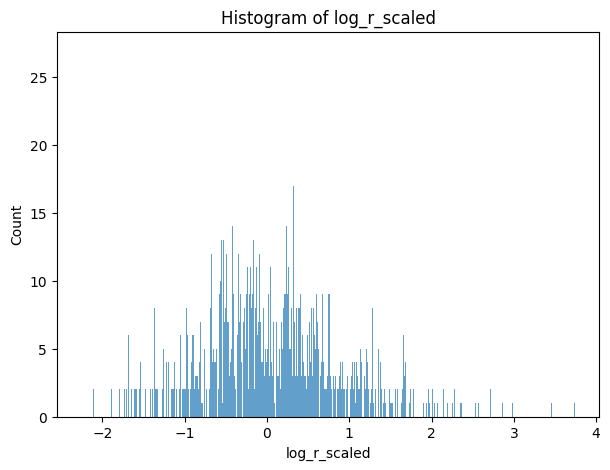

In [22]:
from sklearn.preprocessing import RobustScaler

scaler = RobustScaler()
log_r_scaled = scaler.fit_transform(np.reshape(log_r,(-1,1)))

# Histogram
plt.figure(figsize=(7, 5))
plt.hist(log_r_scaled, bins=2000, alpha=0.7)
plt.xlabel("log_r_scaled")
plt.ylabel("Count")
plt.title("Histogram of log_r_scaled")
plt.show()


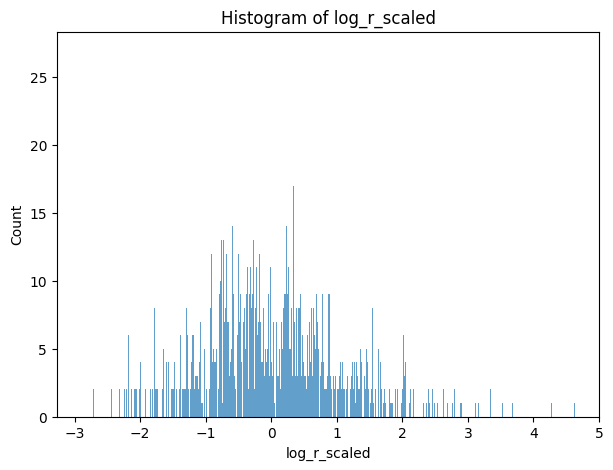

In [23]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
log_r_scaled = scaler.fit_transform(np.reshape(log_r,(-1,1)))

# Histogram
plt.figure(figsize=(7, 5))
plt.hist(log_r_scaled, bins=2000, alpha=0.7)
plt.xlabel("log_r_scaled")
plt.ylabel("Count")
plt.title("Histogram of log_r_scaled")
plt.show()

In [26]:
len(np.unique(r))/(len(r))

0.9348958333333334

In [18]:
log_r_scaled

NameError: name 'log_r_scaled' is not defined

In [12]:
from scipy.stats import skew, kurtosis

print("Skewness:", skew(log_r))
print("Kurtosis:", kurtosis(log_r))
print("Min:", log_r.min())
print("Max:", log_r.max())



Skewness: 0.4652589801510885
Kurtosis: 0.8782158882311109
Min: -5.319857907141061
Max: 6.457073063228573


In [13]:
from scipy.stats import boxcox

# Shift your r values if they contain 0 or negative values
r_shifted = r  # epsilon = small constant, e.g., 1e-6

# Apply Box-Cox
r_boxcox, lambda_ = boxcox(r_shifted)

print("Lambda used:", lambda_)


Lambda used: -0.08160437473183293


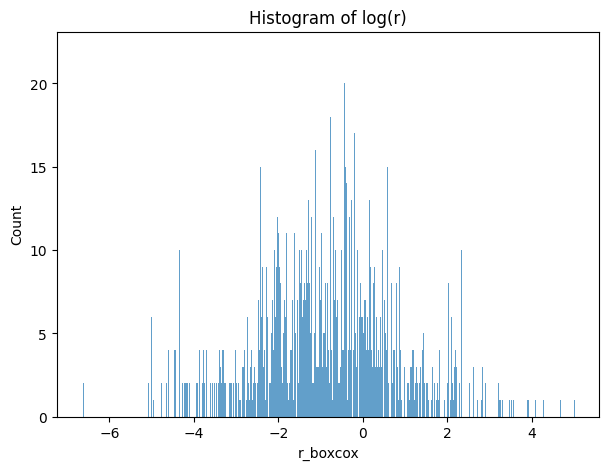

In [ ]:
import numpy as np
import matplotlib.pyplot as plt


# Histogram
plt.figure(figsize=(7, 5))
plt.hist(r_boxcox, bins=2000, alpha=0.7)
plt.xlabel("r_boxcox")
plt.ylabel("Count")
plt.title("Histogram of r_boxcox")
plt.show()